<a href="https://colab.research.google.com/github/kubraacar5/Trendyol-Data-Science-Bootcamp/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.datasets import make_regression
from sklearn.datasets import fetch_california_housing

In [2]:
cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target
df = pd.DataFrame(
dict(MedInc=X['MedInc'], Price=cal_housing.target))
X, y = df["MedInc"].to_numpy(), df["Price"].to_numpy() 

In [3]:
df.head()

,MedInc,Price
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,5.6431,3.413
4,3.8462,3.422


In [4]:
fig = px.scatter(df, x="MedInc", y="Price", color="MedInc", trendline="ols")
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


* *We should define a loss function where errors made after a certain threshold are penalized equally.*

 $
 L(\beta_0,\beta_1) = \left\{ \begin{array}{cl}
(y_i - \hat{y}_i)^2 &, \ (y_i - \hat{y}_i)^2 \le  θ \\
\theta &, \ (y_i - \hat{y}_i)^2 >  θ
\end {array} \right\}   $

* *Therefore, our new loss function should be:*

 $
   L(\beta_0,\beta_1,\theta) = θ * ( 1- e^{-K(y_i - \hat{y}_i)^2} )  $

In [10]:
theta=5
K = 0.001
def thereshold_loss(y,x, b0,b1):
    y_pred  = b0 + b1 * x
    error = (y- y_pred)**2
    return theta*(1-np.exp(-K*error)).sum()

t_loss=[]
loss=[]
b0_ = np.linspace(-25, 25, 1000)
for b0, K in enumerate(b0_):
    err=theta*(1-np.power(np.e,(-(1/theta)*(np.power((K),2)))))
    loss.append(K)
    t_loss.append(err)

convexity = pd.DataFrame(dict(loss=loss, t_loss=t_loss))
fig = px.scatter(convexity, x="loss", y="t_loss")
fig.show()


* *As we see above, our function has convexity.*

In [22]:
import plotly.graph_objects as go

fig = go.Figure(data =
     go.Contour(z = convexity))
fig.show()

***Gradient descent algorithm***

In [32]:
def t_loss_model(x, y, alpha): # -> np.ndarray:
    theta=5
    beta = np.random.random(2)
    
    for i in range(1000000):
        K = 0.001
        b0=beta[0]
        b1=beta[1]
        y_pred= beta[0] + beta[1] * x    
        g_b0 = (2 * K * (b0 - y+(b1*x)) * np.exp(-K * (-b0+y-(b1*x))**2)).sum()
        g_b1 = (2* K * x * ((x*b1) - y+b0) * np.exp(-K *((-x*b1) + y-b0)**2)).sum()
        if(i%100 == 0): 
            print(f"({i}) beta: {beta}, gradient: {g_b0} {g_b1}")
        
  # updating gradients
        
        beta_prev = np.copy(beta)
        beta[0] = beta[0] - alpha * g_b0
        beta[1] = beta[1] - alpha * g_b1
        
  #early stopping 
        
        if np.linalg.norm(beta - beta_prev) < 0.000001:
            print(f"I do early stoping at iteration {i}")
            break
    print(f'Loss  : {thereshold_loss(y,x, beta[0],beta[1])}')
    return beta


In [33]:
beta=t_loss_model(x,y,0.001)

(0) beta: [0.19506217 0.33304411], gradient: -24.032171681906558 -105.6351549777711
(100) beta: [0.3444874  0.44019885], gradient: -0.8042464840749353 0.16918811019544622
(200) beta: [0.40082133 0.42834821], gradient: -0.37284067039231483 0.07843079547926335
(300) beta: [0.42693631 0.4228547 ], gradient: -0.17283388244597986 0.036356724692132136
(400) beta: [0.439042  0.4203082], gradient: -0.08011654207263763 0.016852902870273745
(500) beta: [0.44465351 0.4191278 ], gradient: -0.03713727254356991 0.0078119778266962925
(600) beta: [0.44725466 0.41858063], gradient: -0.017214535372295336 0.0036211423815175614
(700) beta: [0.4484604 0.418327 ], gradient: -0.007979569331292624 0.0016785312252354245
(800) beta: [0.4490193  0.41820944], gradient: -0.0036988188896294183 0.0007780596424682429
(900) beta: [0.44927837 0.41815494], gradient: -0.0017145353144685238 0.0003606585130206952
I do early stoping at iteration 973
Loss  : 84276.34027746097


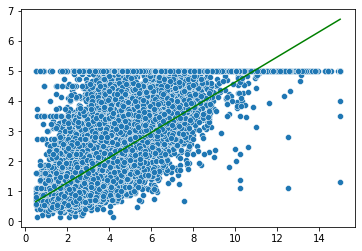

In [51]:
sns.scatterplot(x=x, y=y)
sns.lineplot(x=x, y=beta[0] + beta[1] * x, color = 'green')
display()

In [58]:
def t_loss_model_L2(x, y, alpha,lam): # -> np.ndarray:
    theta=5
    beta = np.random.random(2)
    
    for i in range(1000000):
        K = 0.001
        b0=beta[0]
        b1=beta[1]
        y_pred= beta[0] + beta[1] * x    
        g_b0 = (2 * K * (b0 - y+(b1*x)) * np.exp(-K * (-b0+y-(b1*x))**2)).sum() + 2 * lam * beta[0]
        g_b1 = (2* K * x * ((x*b1) - y+b0) * np.exp(-K *((-x*b1) + y-b0)**2)).sum() + 2 * lam * beta[1]
        if(i%100 == 0): 
            print(f"({i}) beta: {beta}, gradient: {g_b0} {g_b1}")
        
  # updating gradients
        
        beta_prev = np.copy(beta)
        beta[0] = beta[0] - alpha * g_b0
        beta[1] = beta[1] - alpha * g_b1
        
  #early stopping 
        
        if np.linalg.norm(beta - beta_prev) < 0.000001:
            print(f"I do early stoping at iteration {i}")
            break
    print(f'Loss L2 : {thereshold_loss(y,x, beta[0],beta[1])}')
    return beta


In [59]:
beta=t_loss_model_L2(x,y,0.001,0.1)

(0) beta: [0.12002543 0.69992517], gradient: 31.31778834550691 162.7587905278374
(100) beta: [0.27547611 0.45458873], gradient: -1.2980139181989316 0.2730757584957555
(200) beta: [0.36561435 0.43562614], gradient: -0.5897920076352693 0.1240716557170113
(300) beta: [0.40656904 0.42701083], gradient: -0.26795946096792767 0.05636772490679333
(400) beta: [0.4251755  0.42309681], gradient: -0.12173603581535244 0.025607977138537852
(500) beta: [0.43362847 0.42131868], gradient: -0.05530450704640716 0.011633604588177415
(600) beta: [0.43746863 0.42051088], gradient: -0.025124535674097906 0.005285070247547458
(700) beta: [0.43921319 0.42014391], gradient: -0.011413893951578893 0.002400966370689317
(800) beta: [0.44000573 0.41997719], gradient: -0.005185239731976751 0.0010907390668792316
(900) beta: [0.44036577 0.41990145], gradient: -0.0023556105617528744 0.0004955134227051655
(1000) beta: [0.44052934 0.41986705], gradient: -0.0010701335620198066 0.0002251074513008322
I do early stoping at ite

**Comparing We Do Model and You Do Model**

In [66]:
def wedo(x, y, lam, alpha=0.0001) -> np.ndarray:
    print("starting sgd")
    beta = np.random.rand(2)

    for i in range(1000):
        y_pred: np.ndarray = beta[0] + beta[1] * x

        g_b0 = -2 * (y - y_pred).sum() + 2 * lam * beta[0]
        g_b1 = -2 * (x * (y - y_pred)).sum() + 2 * lam * beta[1]
        
        if(i%100 == 0): 
            print(f"({i}) beta: {beta}, gradient: {g_b0} {g_b1}")      

        beta_prev = np.copy(beta)

        beta[0] = beta[0] - alpha * g_b0
        beta[1] = beta[1] - alpha * g_b1

        if np.linalg.norm(beta - beta_prev) < 0.000001:
            print(f"I do early stoping at iteration {i}")
            break
            
    print(f'Loss with L2 regularized : {thereshold_loss(y,x, beta[0],beta[1])}' )
    return beta

In [67]:
wedo_beta = wedo(x, y, 0.001, 0.000001)

starting sgd
(0) beta: [0.8967174  0.90797734], gradient: 96704.21345195328 447318.9295213472
(100) beta: [0.60274678 0.38599543], gradient: 1166.1582227593872 -245.24600060061752
(200) beta: [0.5211325  0.40315912], gradient: 539.5568870241082 -113.47016730378446
(300) beta: [0.48337128 0.4111004 ], gradient: 249.64162551312424 -52.50026029544158
(400) beta: [0.46589996 0.41477466], gradient: 115.50393051706538 -24.290766432991752
(500) beta: [0.45781635 0.41647466], gradient: 53.44123976707503 -11.238826828341868
(600) beta: [0.45407623 0.41726122], gradient: 24.726137847058606 -5.199968836960739
(700) beta: [0.45234576 0.41762514], gradient: 11.440264026373947 -2.4059162328950574
(800) beta: [0.45154511 0.41779352], gradient: 5.29316959253823 -1.1131668479895045
(900) beta: [0.45117466 0.41787143], gradient: 2.4490382626493226 -0.5150388922373885
Loss with L2 regularized : 84291.75110779019


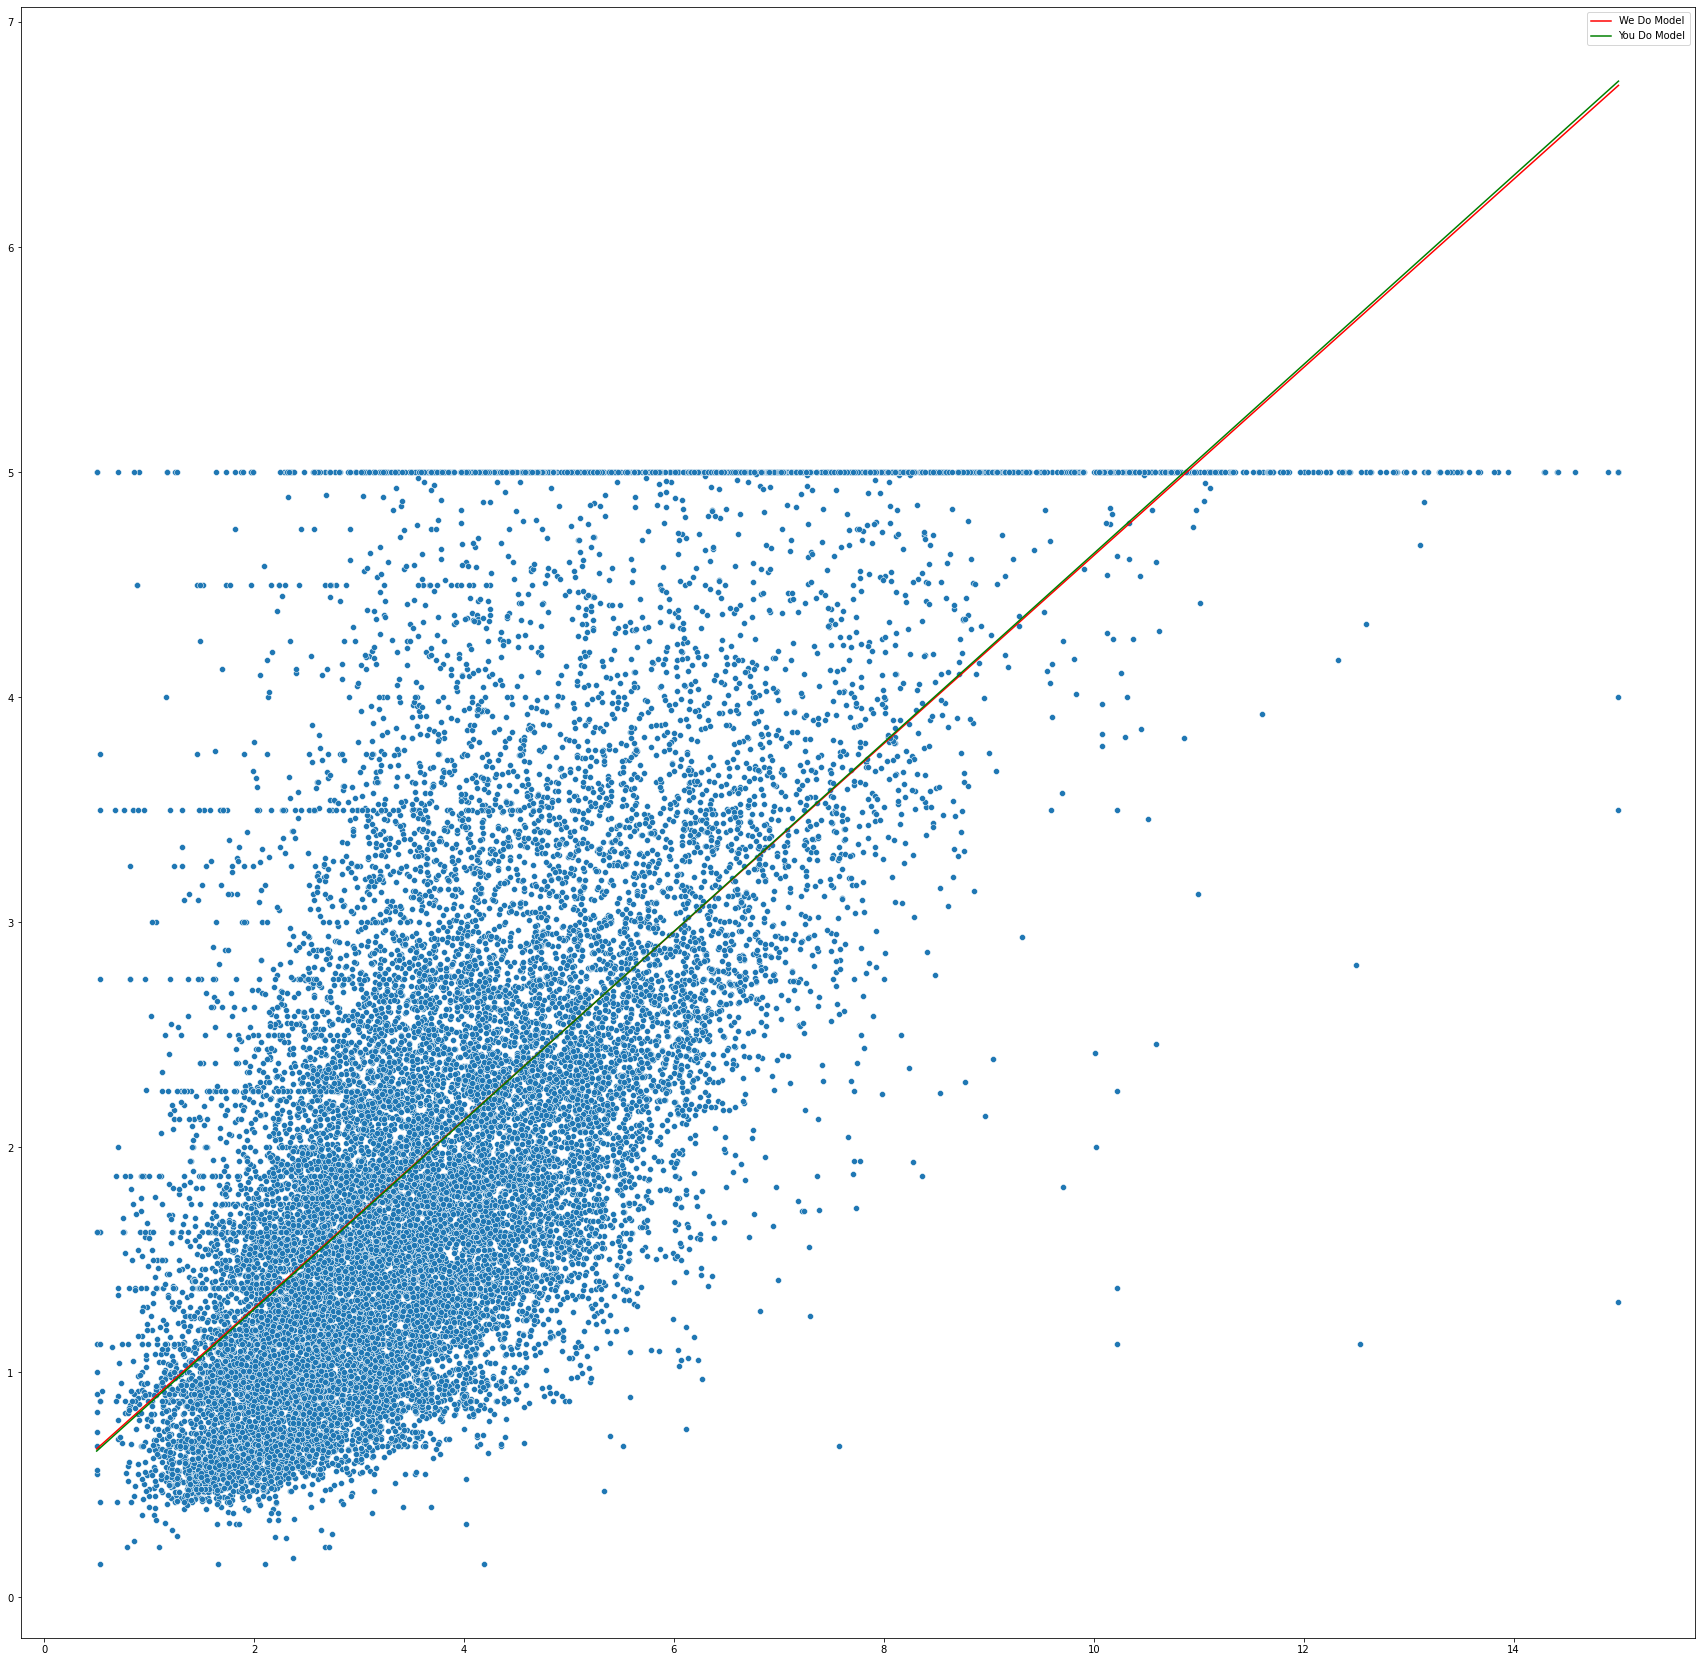

In [69]:
from matplotlib import pyplot as plt
plt.figure(figsize=(30,30))
sns.scatterplot(x=x, y=y)
sns.lineplot(x=x, y=wedo_beta[0] + wedo_beta[1] * x, label='We Do Model', color = 'r')
sns.lineplot(x=x, y=beta[0] + beta[1] * x, label='You Do Model', color = 'g')
plt.show()